# <center><font color='green'>Task 1: PERFORM DATA CLEANING</font></center>

## Performing Necessary Steps

### Importing Required Libraries

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Reading the given CSV file

In [75]:
df=pd.read_csv("C:\\Users\\ayesh\\Downloads\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Getting the shape (rows,columns) of the obtained dataset

In [76]:
df.shape

(891, 12)

## Phase 1: Removing NULL values

### Checking each column for NULL values

In [77]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Removing/Deleting the rows containing NULL values

In [78]:
df.dropna(subset=['Age','Cabin','Embarked'],axis='rows',inplace=True)

### Re-Checking the columns for confirmation

In [80]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

### Checking the shape for assurance

In [79]:
df.shape

(183, 12)

## Phase 2: Removing Outliers

### Plotting Box Plot for the numeric columns to check whether the column contains outliers or not?

<Axes: >

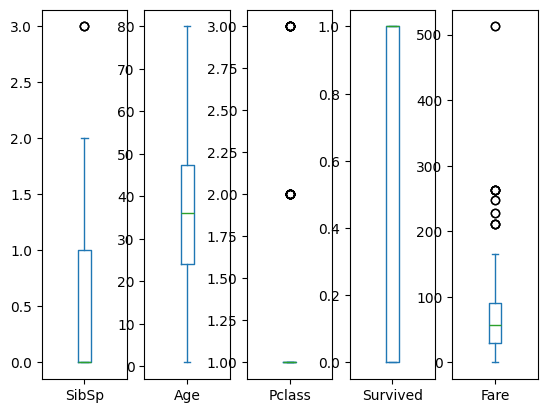

In [81]:
plt.subplot(1,5,1)
df['SibSp'].plot(kind='box')
plt.subplot(1,5,2)
df['Age'].plot(kind='box')
plt.subplot(1,5,3)
df['Pclass'].plot(kind='box')
plt.subplot(1,5,4)
df['Survived'].plot(kind='box')
plt.subplot(1,5,5)
df['Fare'].plot(kind='box')

### Removing outliers from the columns of above chart

In [85]:
for i in ('SibSp','Pclass','Fare'):
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    Q2=Q3-Q1
    upper_limit=Q1+1.5*Q2
    lower_limit=Q3-1.5*Q2
    upper_limit,lower_limit
    
    print("Total Outliers in ",i,": ",df[(df[i]>upper_limit)|(df[i]<lower_limit)].shape[0])

    df.drop(axis='rows',index=df[(df[i]>upper_limit)|(df[i]<lower_limit)].index,inplace=True)

Total Outliers in  SibSp :  0
Total Outliers in  Pclass :  0
Total Outliers in  Fare :  9


### Re-Plotting Box Plot for the confirmation

<Axes: >

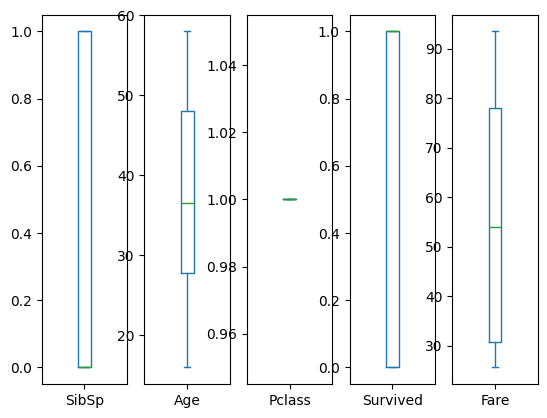

In [86]:
plt.subplot(1,5,1)
df['SibSp'].plot(kind='box')
plt.subplot(1,5,2)
df['Age'].plot(kind='box')
plt.subplot(1,5,3)
df['Pclass'].plot(kind='box')
plt.subplot(1,5,4)
df['Survived'].plot(kind='box')
plt.subplot(1,5,5)
df['Fare'].plot(kind='box')

### Checking the shape for assurance

In [83]:
df.shape

(109, 12)

# <center><font color='green'>Thank You</font></center>